In [5]:
import pandas as pd

# Load the dataset
url = "/content/wine.csv"
data = pd.read_csv(url)

# Split into features and target
X = data.drop(columns='Alcohol')  # replace 'target_column' with the actual column name
y = data['Alcohol']



In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


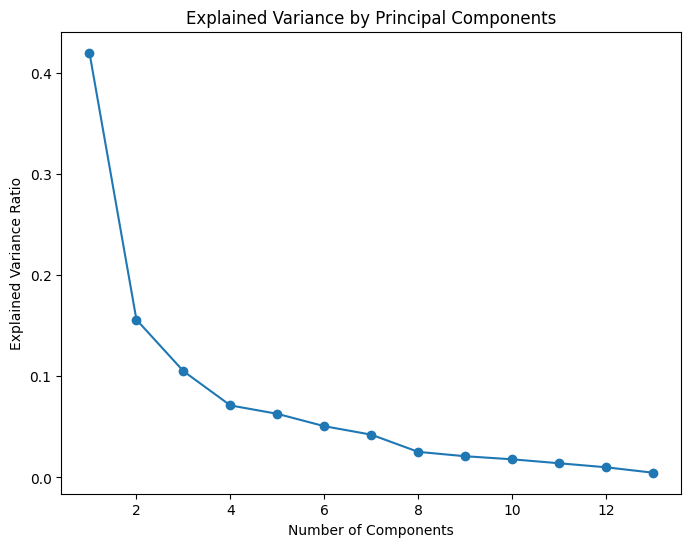

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [8]:
cumulative_variance = explained_variance.cumsum()
optimal_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1

print(f"Optimal number of components: {optimal_components}")


Optimal number of components: 9


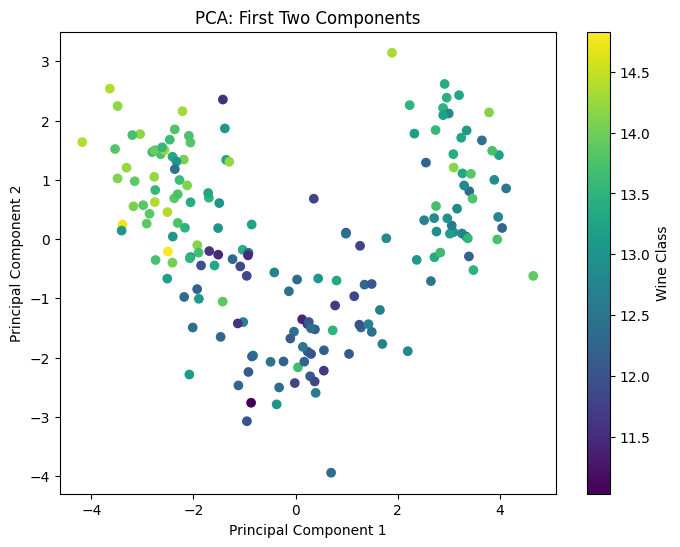

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA: First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Class')
plt.show()


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters based on wine types
kmeans.fit(X_pca[:, :optimal_components])

# Cluster centers
print(f"Cluster centers: \n{kmeans.cluster_centers_}")

# Performance metrics (e.g., silhouette score)
sil_score = silhouette_score(X_pca[:, :optimal_components], kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Cluster centers: 
[[-2.40397870e+00  7.85798281e-01 -1.09043351e-01 -1.22704301e-01
  -1.61267666e-01  2.09560893e-01 -4.49654526e-02 -9.06194833e-03
  -6.35493057e-02]
 [ 3.14803831e+00  8.95490649e-01 -3.34508822e-01  6.58964462e-02
   2.49375599e-03 -8.42913502e-02 -6.20377755e-02 -4.35715379e-02
   7.15715282e-02]
 [ 3.13240327e-02 -1.48368641e+00  3.66855470e-01  7.41695891e-02
   1.61878192e-01 -1.48299717e-01  9.31657097e-02  4.25630000e-02
   9.74531234e-03]]
Silhouette Score: 0.3061883951471082
